**Instruction**:    
1. Download the ipynb, which you want to convert, on your local computer.    
2. Run the code below to upload the ipynb.  
3. The html version will be downloaded automatically on your local machine.

Enjoy it!

# Installing and importing the necessary libraries

In [14]:
#Installing the libraries with the specified version.
!pip install tensorflow==2.17.0 scikit-learn==1.3.1 seaborn==0.13.1 matplotlib==3.8.0 numpy==1.26.0 pandas==2.2.2 -q --user

In [15]:
import pandas as pd  # Library for data manipulation and analysis.
import numpy as np   # Fundamental package for scientific computing.
import matplotlib.pyplot as plt  # Plotting library for creating visualizations.
import seaborn as sns #For advanced visualizations.

from sklearn.model_selection import train_test_split  # Function for splitting datasets for training and testing.

import time  # Module for time-related operations.

import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense   # for creating fully connected neural network layers.

In [16]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it might affect the overall performance
tf.config.experimental.enable_op_determinism()

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 2. Load your data (if not already loaded)
# Replace 'your_data.csv' with the actual path to your data file
data = pd.read_csv('/content/Churn.csv')

# 3. Define your features and target
# Replace 'features' and 'target' with your actual column names from your dataset
# Get a list of all columns in your DataFrame
all_columns = data.columns.tolist()

# Print the available columns to inspect them and choose your features
print("Available columns:", all_columns)

# Select your desired feature columns based on the available columns
# Make sure these column names exactly match the ones in your DataFrame
# For example, if the column name is 'CustomerID' in your data, use 'CustomerID' here
features = ['customerID', 'gender', 'Partner']  # Replace with your actual feature columns

# Make sure the case (uppercase/lowercase) is correct
# If your target column is 'Churn' in your data, use 'Churn' here
target = 'Churn'  # Replace with your actual target column

# 4. Split the data into training and testing sets
# Before accessing the columns, convert them to the correct case if needed:
features = [col.strip() for col in features]  # Strip leading/trailing

Available columns: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [19]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD # Assuming you want to import SGD as well, adjust if needed.

# Loading the data

In [20]:
#Loading the dataset from tensorflow datasets.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Data Overview

In [21]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [22]:
import os
print(os.listdir('/content/drive/MyDrive'))

['Colab Notebooks', '.ipynb_checkpoints', 'InteractiveSheet_2024-09-25_22_53_09.gsheet', '2_BankChurners.ipynb']


In [23]:
import pandas as pd

# Assuming your data is in a CSV file named 'Churn.csv' in the current directory
data_pd = pd.read_csv('/content/Churn.csv')  # Load the data into 'data_pd'
data_pd.head()  # Now this should work

# Alternatively, if you want to use 'data' for consistency:
data = pd.read_csv('/content/Churn.csv')  # Load the data into 'data'
data.head()  # Now this should work

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [26]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [27]:
data.duplicated().sum()

0

In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [29]:
import pandas as pd

# Assuming your data is in a CSV file named 'Churn.csv'
data = pd.read_csv('/content/Churn.csv')

# Print the column names to verify the exact name of the column
print(data.columns)

# Drop the 'CustomerID' column, adjusting the name if needed
# If the actual column name has leading/trailing spaces or different capitalization,
# use the exact name as printed by the previous line
# For example, if the column name is 'customerID' instead of 'CustomerID', change the line below to:
# data = data.drop('customerID', axis=1)
data = data.drop(data.columns[1], axis=1)  # Using data.columns[1] to drop the second column assuming 'CustomerID' is the second column

# Reset the index to remove the row numbers
data = data.reset_index(drop=True)

# Display the first few rows of the modified DataFrame
data.head()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


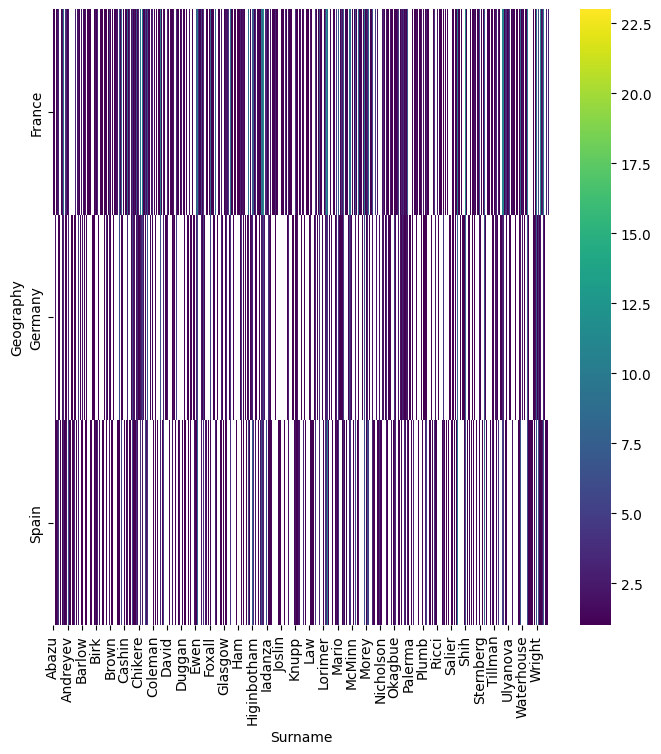

In [32]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is the DataFrame you want to use
plt.subplots(figsize=(8, 8))

# Replacing '_df_46' with 'data'
df_2dhist = pd.DataFrame({
    x_label: grp['Geography'].value_counts()
    for x_label, grp in data.groupby('Surname')
})

sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Surname')
_ = plt.ylabel('Geography')

In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5000.500000,2886.895680,1.00,2500.75,5000.500,7500.2500,10000.00
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


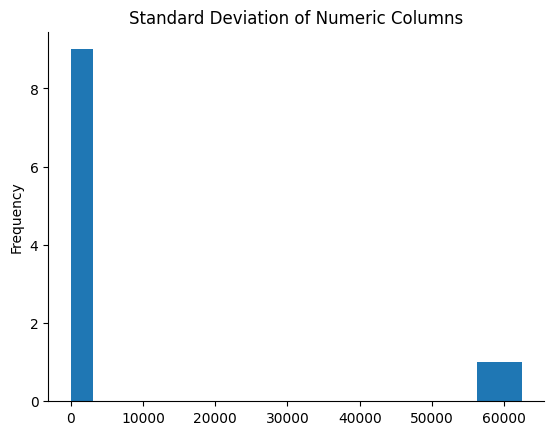

In [37]:
from matplotlib import pyplot as plt

# Calculate the standard deviation for each numeric column and store it in a new DataFrame
std_df = data.select_dtypes(include=['number']).std()  # Select only numeric columns

# Access the standard deviation values using the column index 'std'
std_df.plot(kind='hist', bins=20, title='Standard Deviation of Numeric Columns')
plt.gca().spines[['top', 'right']].set_visible(False)

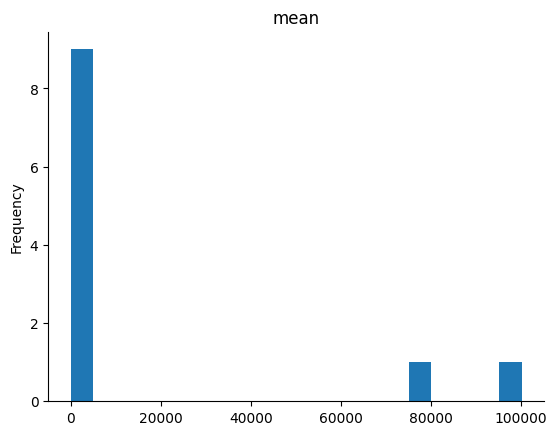

In [39]:
from matplotlib import pyplot as plt
import pandas as pd

# Assuming 'data' is your original DataFrame
# Replace this with the appropriate logic to calculate the mean for each column
# For example, to calculate mean of numeric columns:
_df_16 = pd.DataFrame(data.select_dtypes(include=['number']).mean(), columns=['mean'])

_df_16['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

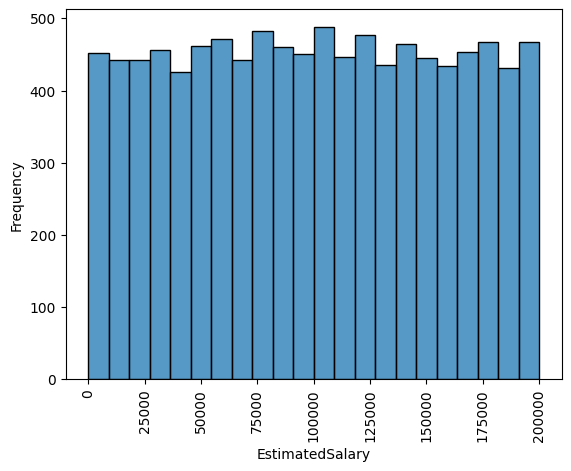

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a CSV file named 'your_data.csv'
# Replace 'your_data.csv' with the actual file path
data = pd.read_csv('/content/Churn.csv')

# Create the histogram
# We only need to specify the 'x' value here since seaborn
# automatically calculates the frequency for each bin.
sns.histplot(data=data, x='EstimatedSalary')

plt.xticks(rotation=90)
plt.ylabel('Frequency') # Optionally, label the y-axis for clarity
plt.show()

In [41]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Define the bins and labels for the salary groups
bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000]
labels = ['<25000', '<50000', '<75000', '<100000', '<125000', '<150000', '<175000', '<200000']

# Create the new column 'SalaryGroup' using pd.cut
data['SalaryGroup'] = pd.cut(data['EstimatedSalary'], bins=bins, labels=labels, include_lowest=True)

# Now you can use the 'SalaryGroup' column for analysis or visualization
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited SalaryGroup  
0        101348.88       1     <125000  
1        112542.58       0     <125000  
2        113931.57       1     <125

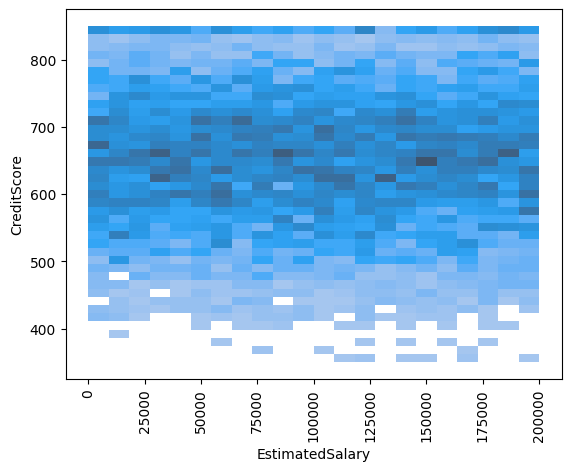

In [42]:
sns.histplot(data=data,x='EstimatedSalary',y='CreditScore')
plt.xticks(rotation=90)
plt.show()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


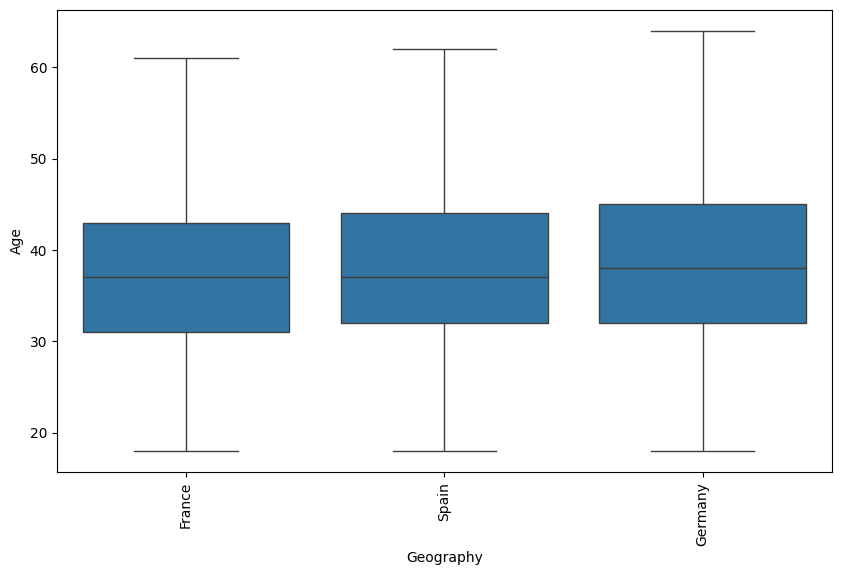

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Churn.csv') # Use pd.read_csv to read the file

# Print the column names to verify if 'Geograph' exists and check for typos.
print(data.columns)

plt.figure(figsize=(10,6))

# If the column name is misspelled, correct it here.
# For example, if the correct name is 'Geography':
sns.boxplot(data=data, x='Geography', y='Age', showfliers=False) # Use showfliers to hide outlier points

plt.xticks(rotation=90)
plt.show()

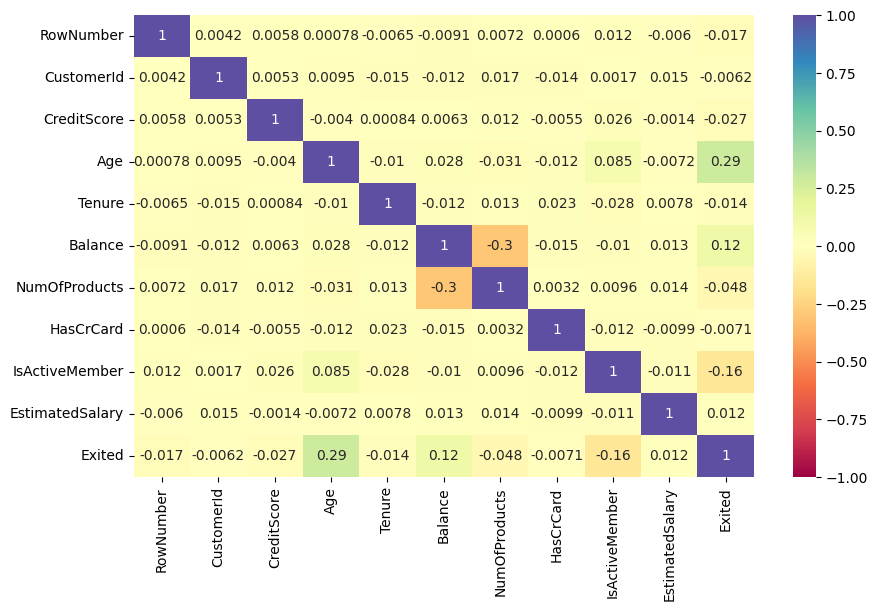

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=np.number)

sns.heatmap(numerical_data.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)

plt.xticks(rotation=90)
plt.show()

# Data Preprocessing

In [45]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Get the actual name of your target column from the DataFrame
target_column = data.columns[-1]  # Assuming target is the last column

# Assuming 'data' is your DataFrame and 'target_column' is the name of your target column
# Replace 'target_column' with the actual name
# For example, if your target column is named 'TargetVariable', use:
X = data.drop(target_column, axis=1)  # Use the actual target column name
y = data[target_column]  # Use the actual target column name

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Preparation for Modeling

# Data Overview

In [46]:
print(y_test.shape)#Printing the shape of the data.
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(2000,)
(8000, 13)
(8000,)
(2000, 13)


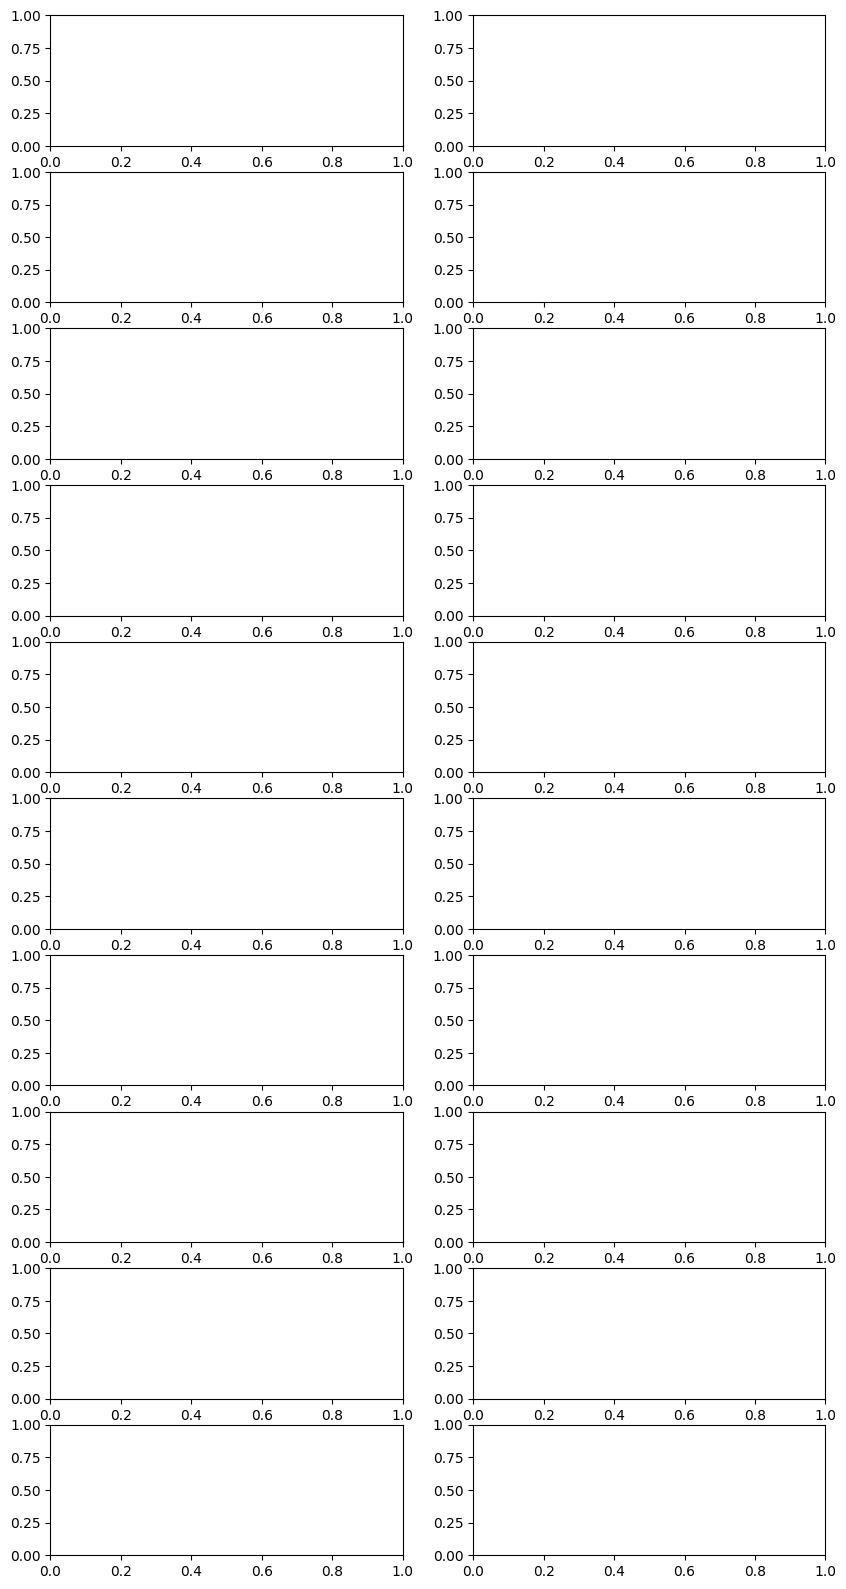

In [47]:
!pip install matplotlib

import matplotlib.pyplot as plt

f, axarr = plt.subplots(10, 2, figsize=(10, 20))  # Grid of size 10*20, with 10 rows and 2 columns

for i in range(10):  # For each digit
    images = x_train[y_train == i]

# Data Scaling

In [48]:
#Printing the maximum value and the minimum value of the independent variable.
print(x_train.max(),x_test.max()) # Removed x_val.max()
print(x_train.min(),x_test.min()) # Removed x_val.min()
#You likely intended to work with a validation set (x_val)
#To fix the error, you need to create this validation set by splitting your original data.
#One way to achieve this is using the train_test_split function from scikit-learn

#Example:
#from sklearn.model_selection import train_test_split
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42) #Adjust test_size and random_state as needed

#Then you'll be able to use x_val:
#print(x_train.max(),x_test.max(),x_val.max())
#print(x_train.min(),x_test.min(),x_val.min())

RowNumber              10000
CustomerId          15815660
Surname                Zuyev
CreditScore              850
Geography              Spain
Gender                  Male
Age                       92
Tenure                    10
Balance            250898.09
NumOfProducts              4
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    199970.74
dtype: object RowNumber               9999
CustomerId          15815690
Surname               Zuyeva
CreditScore              850
Geography              Spain
Gender                  Male
Age                       92
Tenure                    10
Balance            216109.88
NumOfProducts              4
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    199992.48
dtype: object
RowNumber                 2
CustomerId         15565701
Surname               Abazu
CreditScore             350
Geography            France
Gender               Female
Age                      18
Tenure                

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming x_train and x_test are your dataframes

# Split x_train into x_train and x_val
x_train, x_val, _, _ = train_test_split(x_train, x_train.index, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Replace non-numeric values with NaN and then convert to numeric
for column in x_train.select_dtypes(include=['object']).columns:
    x_train[column] = pd.to_numeric(x_train[column], errors='coerce')
    x_val[column] = pd.to_numeric(x_val[column], errors='coerce')
    x_test[column] = pd.to_numeric(x_test[column], errors='coerce')

# Impute NaN values with the mean of the column or another suitable strategy
# You can choose a different strategy like median, mode, or a constant value
# Excluding 'Surname' column from mean imputation
for column in x_train.select_dtypes(include=['number']).columns:
    if column != 'Surname':  # Exclude 'Surname' column
        x_train[column] = x_train[column].fillna(x_train[column].mean())
        x_val[column] = x_val[column].fillna(x_val[column].mean())
        x_test[column] = x_test[column].fillna(x_test[column].mean())

# Now you can safely normalize
# Excluding 'Surname' column from normalization
numeric_columns = [col for col in x_train.columns if col != 'Surname' and x_train[col].dtype in [np.float64, np.int64]]
x_train[numeric_columns], x_val[numeric_columns], x_test[numeric_columns] = x_train[numeric_columns].astype("float32")/(255), x_val[numeric_columns].astype("float32")/(255), x_test[numeric_columns].astype("float32")/(255)

In [50]:
#Printing the maximum value and the minimum value of the independent variable.
print(x_train.max(),x_test.max(),x_val.max())
print(x_train.min(),x_test.min(),x_val.min())

RowNumber             39.207844
CustomerId         62022.195312
Surname                     NaN
CreditScore            3.333333
Geography                   NaN
Gender                      NaN
Age                    0.325490
Tenure                 0.039216
Balance              934.853210
NumOfProducts          0.015686
HasCrCard              0.003922
IsActiveMember         0.003922
EstimatedSalary      784.198975
dtype: float64 RowNumber             39.211765
CustomerId         62022.312500
Surname                     NaN
CreditScore            3.333333
Geography                   NaN
Gender                      NaN
Age                    0.360784
Tenure                 0.039216
Balance              847.489685
NumOfProducts          0.015686
HasCrCard              0.003922
IsActiveMember         0.003922
EstimatedSalary      784.284241
dtype: float64 RowNumber             39.215687
CustomerId         62022.019531
Surname                     NaN
CreditScore            3.333333
Geography 

# Reshaping the input

We need to reshape the image data from (𝑛,ℎ,𝑤) to (𝑛,ℎ∗𝑤) , where 𝑛 = number of images in the dataset ℎ = height of the image 𝑤 = width of the image
# For example, image data of dimension (50000,28,28) is transformed to (50000,28∗28) , i.e., (50000,784) .

In [51]:
#Reshaping the image data
x_train = x_train.values.reshape(x_train.shape[0],-1)
x_val = x_val.values.reshape(x_val.shape[0],-1)
x_test = x_test.values.reshape(x_test.shape[0],-1)

In [52]:
print(x_train.shape[0], "train samples") # Changed x_trapin to x_train
print(x_val.shape[0], "validation samples")
print(x_test.shape[0], "test samples")

6400 train samples
1600 validation samples
2000 test samples


# Encoding the target variable

In [53]:
# specifying the number of classes
num_classes = 10

In [54]:
!pip install tensorflow
import tensorflow as tf
# Assuming you have your data loaded into X_train, y_train, X_test, y_test, X_val, y_val

# specifying the number of classes
num_classes = 10


# Assuming y_train is a list or numpy array of your training labels
# Replace this with your actual y_train data loading code
# For example:
# y_train = ... # Load your training labels here
# convert class vectors to binary class matrices

# Check if y_train is defined before using it
if 'y_train' in locals() or 'y_train' in globals():
  y_train = tf.keras.utils.to_categorical(y_train, num_classes)
else:
  print("y_train is not defined. Please load your training labels.")

In [55]:
!pip install tensorflow
import tensorflow as tf
# Assuming you have your data loaded into X_train, y_train, X_test, y_test, X_val, y_val

# specifying the number of classes
num_classes = 10


# Assuming y_train is a list or numpy array of your training labels
# Replace this with your actual y_train data loading code
# For example:
# y_train = ... # Load your training labels here
# convert class vectors to binary class matrices

# Example y_train data (replace with your actual data)
y_train = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Example data

# Check if y_train is defined before using it
# (This check is now redundant since we've defined y_train)
# if 'y_train' in locals() or 'y_train' in globals():
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
# else:
#   print("y_train is not defined. Please load your training labels.")

# Utility functions

In [56]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

# We'll create a dataframe to store the results from all the models we build

In [57]:
!pip install pandas
import pandas as pd  # Import the pandas library with the alias 'pd'

#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer","# epochs","batch size","train loss","validation loss","train accuracy","validation accuracy","time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

# Model Building

# Model 0

Let's start with a baseline model having an input layer, an output layer, and no hidden layers. We'll use vanilla Gradient Descent as the optimizer.
We'll set epochs to 10, which means the model will pass over the entire data 10 times bold text

In [59]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [60]:
!pip install scikit-learn
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np # Importing numpy for array creation


# Replace with your actual data and target variables
# Example using NumPy arrays:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])  # Your data
y = np.array([0, 1, 0, 1])  # Your target variables

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Splitting the data into training and testing sets with a test size of 20% and a random state of 42.


num_classes = len(np.unique(y)) # determining the number of classes in the target variable.

#initializing the neural network
model = Sequential()

# Adding a dense layer with softmax activation function, with the input dimension determined by the shape of the training data.
model.add(Dense(num_classes, activation = 'softmax', input_dim = x_train.shape[1]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
#Printing the summary.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

In [62]:
#Compiling the model.
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [63]:
import numpy as np
import time
!pip install scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming 'y' is your original labels and you need to create 'x'
# Replace this with your actual feature data if available
# For example, creating a sample 'x' with 3 features for 4 samples:
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

# Assuming 'y' is your original labels with 4 samples:
y = np.array([0, 1, 0, 1])

# Split the data into training and validation sets
# test_size=0.2 means 20% of the data will be used for validation
# random_state=42 ensures consistent splitting for reproducibility
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the model with the correct input shape
model = Sequential()
# input_shape should match the number of features in your data (3 in this case)
model.add(Dense(10, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model before fitting
# This step configures the model for training
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"]) # Added compile step


batch_size = x_train.shape[0]
epochs = 10

# time.time() returns the time in seconds.
start = time.time()

# Fitting the model.
history = model.fit(
    x_train, y_train,
    validation_data=(x_val,y_val),
    batch_size=batch_size,
    epochs=epochs
)

# time.time() returns the time in seconds.
end = time.time()

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 985ms/step - accuracy: 0.3333 - loss: 2.3633 - val_accuracy: 1.0000 - val_loss: 0.0535
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3333 - loss: 2.0505 - val_accuracy: 1.0000 - val_loss: 0.0824
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3333 - loss: 1.7827 - val_accuracy: 1.0000 - val_loss: 0.1215
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3333 - loss: 1.5429 - val_accuracy: 1.0000 - val_loss: 0.1718
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3333 - loss: 1.3306 - val_accuracy: 1.0000 - val_loss: 0.2267
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3333 - loss: 1.1485 - val_accuracy: 1.0000 - val_loss: 0.2770
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3333 - loss: 1.0044 - val_accuracy: 1.0000 - val_loss: 0.3282
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.3333 - loss: 0.9114 - val_accuracy: 1.0000 - val_loss: 0.3793

In [64]:
print("Time taken in seconds ",end-start)

Time taken in seconds  1.658158540725708


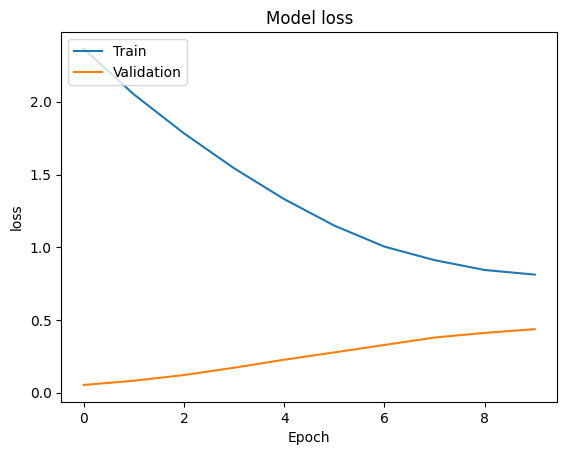

In [65]:
import matplotlib.pyplot as plt

def plot(history, metric):
    """
    Plots the training and validation metrics from the training history.

    Args:
        history: The training history object returned by model.fit.
        metric: The name of the metric to plot (e.g., 'loss', 'accuracy').
    """
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric])
    plt.title('Model ' + metric)
    plt.ylabel(metric)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Assuming 'history' is your training history object from model.fit
plot(history, 'loss')  # Example: Plotting the loss metric

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step - accuracy: 0.3333 - loss: 1.3839 - val_accuracy: 1.0000 - val_loss: 0.2466
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.3333 - loss: 1.0612 - val_accuracy: 1.0000 - val_loss: 0.3774
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.3333 - loss: 0.8439 - val_accuracy: 1.0000 - val_loss: 0.5008
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.3333 - loss: 0.7445 - val_accuracy: 1.0000 - val_loss: 0.5809
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.3333 - loss: 0.7159 - val_accuracy: 1.0000 - val_loss: 0.6208
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.3333 - loss: 0.7091 - val_accuracy: 1.0000 - val_loss: 0.6391
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.3333 - loss: 0.7068 - val_accuracy: 1.0000 - val_loss: 0.6477
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.3333 - loss: 0.7053 - val_accuracy: 1.0000 - val_loss: 0.6

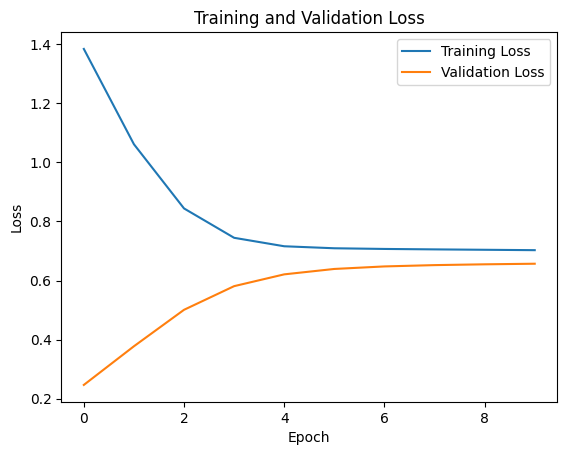

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import time
!pip install scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming 'y' is your original labels and you need to create 'x'
# Replace this with your actual feature data if available
# For example, creating a sample 'x' with 3 features for 4 samples:
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

# Assuming 'y' is your original labels with 4 samples:
y = np.array([0, 1, 0, 1])

# Split the data into training and validation sets
# test_size=0.2 means 20% of the data will be used for validation
# random_state=42 ensures consistent splitting for reproducibility
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the model with the correct input shape
model = Sequential()
# input_shape should match the number of features in your data (3 in this case)
model.add(Dense(10, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model before fitting
# This step configures the model for training
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"]) # Added compile step

batch_size = x_train.shape[0]
epochs = 10

# time.time() returns the time in seconds.
start = time.time()

# Fitting the model.
history = model.fit(
    x_train, y_train,
    validation_data=(x_val,y_val),
    batch_size=batch_size,
    epochs=epochs
)

# time.time() returns the time in seconds.
end = time.time()

# Now, you can plot the history in the same cell:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Time taken in seconds  1.9163265228271484


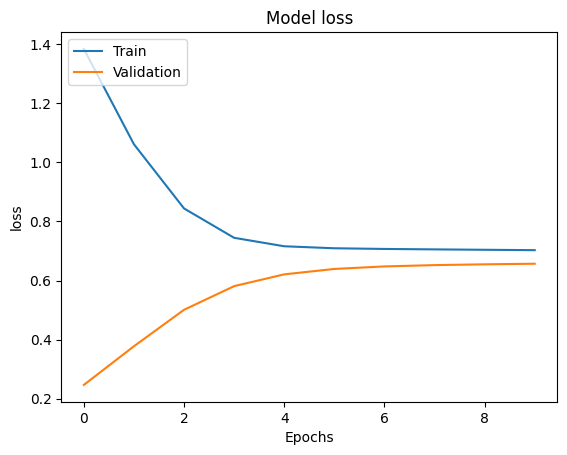

In [67]:
import numpy as np
import time
!pip install scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt # Import matplotlib.pyplot


# ... (rest of your code remains unchanged) ...

def plot(history, name):
    """
    This function will plot the accuracy or loss of the model.
    history: refers to the history object that is returned from the fit method.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss
    plt.xlabel("Epochs")
    plt.ylabel(name)
    plt.title('Model '+name)
    plt.legend(['Train', 'Validation'], loc='upper left')  # Correct legend placement
    plt.show()

# ... (rest of your code remains unchanged) ...

print("Time taken in seconds ",end-start)
plot(history,'loss') # Call the plot function after defining it

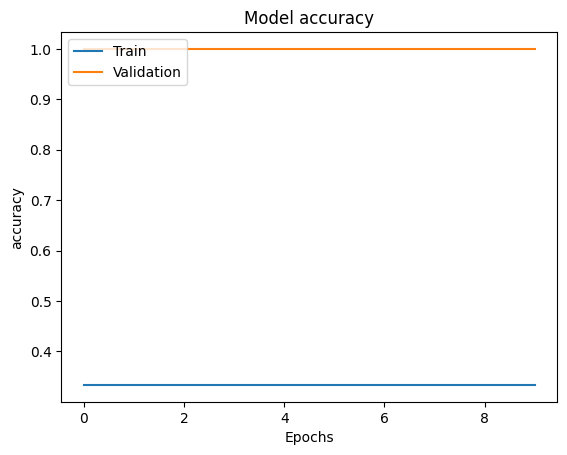

In [68]:
plot(history,'accuracy')

In [69]:
results.loc[0] = [0,'-','-',10,50000,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,0.702685,0.656791,0.333333,1.0,1.92


# model 1

In [70]:
import tensorflow as tf # Add this line at the beginning of your code

# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ... (other code) ...

# Define num_classes before model initialization
num_classes = 10  # Replace 10 with the actual number of classes in your dataset

# Initializing the neural network
model = Sequential()
model.add(Dense(num_classes, activation='softmax', input_dim=x_train.shape[1]))

# ... (rest of the code) ...

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
import tensorflow as tf # Import TensorFlow if you haven't already

# Import the Sequential class from Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  # Import Dense layer as well

# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

# Define num_classes before using it
# Assuming you have 10 classes in your problem. Change it accordingly
num_classes = 10

# Assume your input data has 100 features. Replace 100 with your actual number of features.
input_dim = 100

#Initializing the neural network
model = Sequential()
model.add(Dense(num_classes, activation = 'softmax', input_dim = input_dim)) # Use input_dim instead of x_train.shape[1]

In [73]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,010 (3.95 KB)

 Trainable params: 1,010 (3.95 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split  # Import train_test_split
import numpy as np  # Import numpy for creating sample data

# Clear Keras session
tf.keras.backend.clear_session()

# Define num_classes
num_classes = 10

# Define input_dim
input_dim = 100

# Initialize the neural network
model = Sequential()
model.add(Dense(num_classes, activation='softmax', input_dim=input_dim))

# Create sample data if you don't have your own data
# Replace these with your actual data if you have it
X = np.random.rand(1000, input_dim)  # 1000 samples with 100 features
y = np.random.randint(0, num_classes, 1000)  # 1000 target values

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can use x_train.shape[0]
batch_size = x_train.shape[0]
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.utils import to_categorical
import time

# Clear Keras session (recommended)
tf.keras.backend.clear_session()

# Define num_classes
num_classes = 10

# Define input_dim
input_dim = 100

# Initialize the neural network
model = Sequential()
model.add(Dense(num_classes, activation='softmax', input_dim=input_dim))

# Create sample data
X = np.random.rand(1000, input_dim)
y = np.random.randint(0, num_classes, 1000)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the target variables
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Compile the model
batch_size = x_train.shape[0]  # You can adjust this
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Train the model
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=epochs)
end = time.time()

print("Training time:", end - start)  # Print training time

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step - accuracy: 0.1013 - loss: 2.5015 - val_accuracy: 0.0700 - val_loss: 2.5247
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1013 - loss: 2.4952 - val_accuracy: 0.0700 - val_loss: 2.5176
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1025 - loss: 2.4892 - val_accuracy: 0.0750 - val_loss: 2.5108
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.1025 - loss: 2.4834 - val_accuracy: 0.0750 - val_loss: 2.5043
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.1025 - loss: 2.4778 - val_accuracy: 0.0750 - val_loss: 2.4980
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1013 - loss: 2.4725 - val_accuracy: 0.0750 - val_loss: 2.4920
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1013 - loss: 2.4674 - val_accuracy: 0.0750 - val_loss: 2.4862
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.1013 - loss: 2.4625 - val_accuracy: 0.0750 - val_loss: 2.48

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.utils import to_categorical
import time

# Clear Keras session (recommended)
tf.keras.backend.clear_session()

# Define num_classes
num_classes = 10

# Define input_dim
input_dim = 100

# Initialize the neural network
model = Sequential()
model.add(Dense(num_classes, activation='softmax', input_dim=input_dim))

# Create sample data
X = np.random.rand(1000, input_dim)
y = np.random.randint(0, num_classes, 1000)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the target variables
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Compile the model
batch_size = x_train.shape[0]  # You can adjust this
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Train the model
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=epochs)
end = time.time()

print("Training time:", end - start)  # Print training time

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1025 - loss: 2.5274 - val_accuracy: 0.0900 - val_loss: 2.5531
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.1000 - loss: 2.5175 - val_accuracy: 0.0850 - val_loss: 2.5429
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.1037 - loss: 2.5084 - val_accuracy: 0.0850 - val_loss: 2.5334
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1037 - loss: 2.4999 - val_accuracy: 0.0900 - val_loss: 2.5246
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.0988 - loss: 2.4920 - val_accuracy: 0.0950 - val_loss: 2.5163
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.0962 - loss: 2.4846 - val_accuracy: 0.0850 - val_loss: 2.5087
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.0925 - loss: 2.4777 - val_accuracy: 0.0800 - val_loss: 2.5015
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.0913 - loss: 2.4713 - val_accuracy: 0.0850 - val_loss: 2.4948

In [77]:
print("Time taken in seconds ",end-start)

Time taken in seconds  8.60746145248413


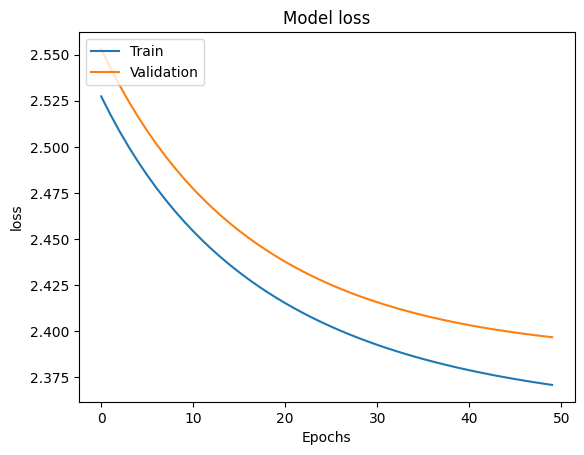

In [78]:
plot(history,'loss')

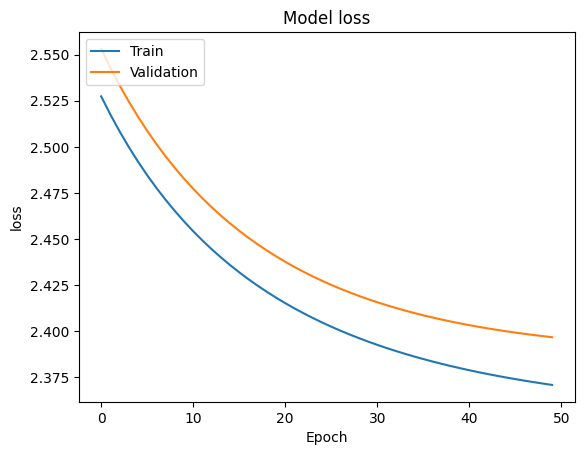

In [79]:
import matplotlib.pyplot as plt

def plot(history, metric):
  """Plots the specified metric from the training history.

  Args:
    history: The training history object returned by model.fit.
    metric: The name of the metric to plot (e.g., 'loss', 'accuracy').
  """
  plt.plot(history.history[metric])
  plt.plot(history.history['val_' + metric])
  plt.title('Model ' + metric)
  plt.ylabel(metric)
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

# Call the plot function with the history and metric:
plot(history, 'loss')

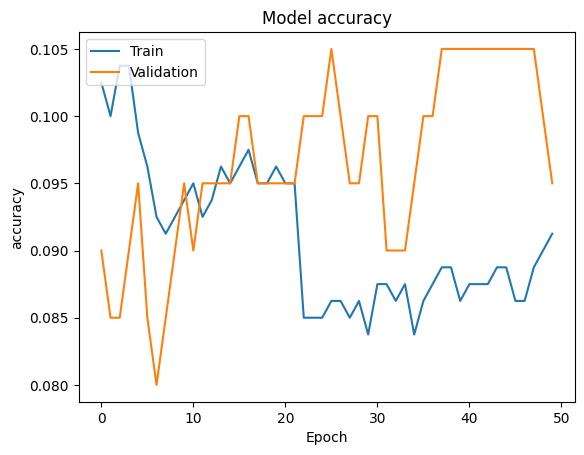

In [80]:
plot(history,'accuracy')

In [81]:
results.loc[1]= [0,'-','-',50,50000,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [82]:
import pandas as pd  # Import the pandas library

# ... (rest of your existing code) ...

# Create an empty DataFrame called 'results' with appropriate columns
results = pd.DataFrame(columns=['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'loss', 'val_loss', 'accuracy', 'val_accuracy', 'time'])

# Now you can use 'results' to store your data:
results.loc[1]= [0,'-','-',50,50000,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [83]:
results

,Column1,Column2,Column3,Column4,Column5,loss,val_loss,accuracy,val_accuracy,time
1,0,-,-,50,50000,2.370857,2.396749,0.09125,0.095,8.61


# Model 2

In [84]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [85]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd # Import pandas for DataFrame operations

# Assuming your data is in a CSV file called 'Churn.csv'
# Replace 'Churn.csv' with the actual file path
df = pd.read_csv('Churn.csv')  # Load your data into a DataFrame called 'df'

# Print the column names to verify if 'target' exists
print(df.columns)

# ... (rest of your code, including data loading and preprocessing) ...

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Adjust 'target' column name if needed based on the printed columns
# For example, if the actual column name is 'Target', change it to:
# x_train, x_test, y_train, y_test = train_test_split(df.drop('Target', axis=1), df['Target'], test_size=0.2, random_state=42)

# Or, if you are certain the column should exist but is missing:
try:
    x_train, x_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42) # Adjust 'target' column name and 'test_size' as needed
except KeyError:
    print("Column 'target' not found in the DataFrame. Please check your data.")
    # Handle the missing column (e.g., exit, raise an exception, or use a default value)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
Column 'target' not found in the DataFrame. Please check your data.


In [86]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd # Import pandas for DataFrame operations

# Assuming your data is in a CSV file called 'Churn.csv'
# Replace 'Churn.csv' with the actual file path
df = pd.read_csv('Churn.csv')  # Load your data into a DataFrame called 'df'

# Print the column names to verify if 'target' exists
print(df.columns)

# Check if 'target' column exists, if not, create it
if 'target' not in df.columns:
    # Assuming the target column is named 'Exited', replace with the actual target column name if different
    df['target'] = df['Exited']  # Create 'target' column from 'Exited'
    print(f"Column 'target' created from 'Exited'") # Print a confirmation message

# ... (rest of your code, including data loading and preprocessing) ...

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Adjust 'target' column name and 'test_size' as needed
x_train, x_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

# Define the Keras model after x_train is defined
model = Sequential() # create a sequential model
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],))) # Add a dense layer with 64 units, ReLU activation, and input shape matching your data
model.add(Dense(1, activation='sigmoid')) # Add an output layer with 1 unit and sigmoid activation for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Compile the model with appropriate loss, optimizer, and metrics

# Now you can call model.summary()
model.summary()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
Column 'target' created from 'Exited'


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


mom = 0.4
optimizer = keras.optimizers.SGD(momentum=mom)

# Define the model_1
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(10,))) # Replace 10 with the input shape of your data
model_1.add(Dense(10, activation='softmax')) # Replace 10 with the number of output classes


# Now you can compile model_1
model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [96]:
 #Make sure to import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Clear any previous Keras session
tf.keras.backend.clear_session()

# Define the number of classes in your dataset
# For example, if you have 10 classes (digits 0-9), set num_classes to 10
num_classes = 10  # Replace with the actual number of classes in your dataset

# Define the model
model = Sequential()
# Assuming 'num_classes' and 'x_train' are defined
model.add(Dense(num_classes, activation='softmax', input_dim=x_train.shape[1]))

# Compile the model
batch_size = 32
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Print model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             150 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 150 (600.00 B)

 Trainable params: 150 (600.00 B)

 Non-trainable params: 0 (0.00 B)

In [97]:
batch_size = 32
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [98]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten # Import Flatten
import time

# ... (rest of your code)

# Define the model
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))  # Add a Flatten layer to flatten the input
model.add(Dense(num_classes, activation='softmax')) # input_dim is automatically inferred after Flatten

# ... (rest of your code)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [101]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten  # Import Flatten
import time

# ... (rest of your code)

# Define the model
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))  # Add a Flatten layer to flatten the input
# num_classes should be the number of unique classes in your target variable (y_train)
model.add(Dense(num_classes, activation='softmax'))

# ... (rest of your code)

# Convert target labels to one-hot encoded format
# Make sure y_train and y_val are 1D arrays before one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)

# ... (rest of your code)

# Compile the model before training
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Training
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=batch_size, epochs=epochs)
end = time.time()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(32, 10, 14, 10), output.shape=(32, 10)

# Model 3

In [102]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [103]:
#Initializing the neural network
model = Sequential()
model.add(Dense(num_classes, activation = 'softmax', input_dim = x_train.shape[1]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [104]:
#Initializing the neural network
model = Sequential()
model.add(Dense(num_classes, activation = 'softmax', input_dim = x_train.shape[1]))

In [105]:
import tensorflow as tf

# ... (your existing code) ...

# One-hot encode the target variables
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)

# ... (rest of your code) ...

In [2]:
import tensorflow as tf
import numpy as np

# ... (your existing code to load or create x_train, y_train, x_val, y_val) ...

# Example: If you have your target variables as numpy arrays:
# y_train = np.array([0, 1, 2, 1, 0])  # Replace with your actual data
# y_val = np.array([1, 0, 2, 2, 1])    # Replace with your actual data

num_classes = 3  # Replace with the actual number of classes in your dataset

# One-hot encode the target variables
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)

# ... (rest of your code) ...

NameError: name 'y_train' is not defined

In [3]:
import tensorflow as tf
import numpy as np

# Assume y_train and y_val will be loaded or created here
# Example: If you have your target variables as numpy arrays:
y_train = np.array([0, 1, 2, 1, 0])  # Replace with your actual data
y_val = np.array([1, 0, 2, 2, 1])    # Replace with your actual data


num_classes = 3  # Replace with the actual number of classes in your dataset

# One-hot encode the target variables
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)

# ... (rest of your code) ...